# Importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the csv file:

In [2]:
df=pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# To get the unique info of species column:

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

# To check if there is missing data:

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

# To get the info of each column:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# To drop each missing data row:

In [9]:
df=df.dropna()

# To check the unique value of island column:

In [10]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

# Also for the sex column:

In [11]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

# To check the (.) sex info:

In [13]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


# To get the description to the sex column when species is Gentoo :

In [14]:
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

# According to the description , the (.) sex row is female , to convert that:

In [15]:
df.at[336,'sex']='FEMALE'

In [17]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

# To plot df with pairplot, and use species column as hue:

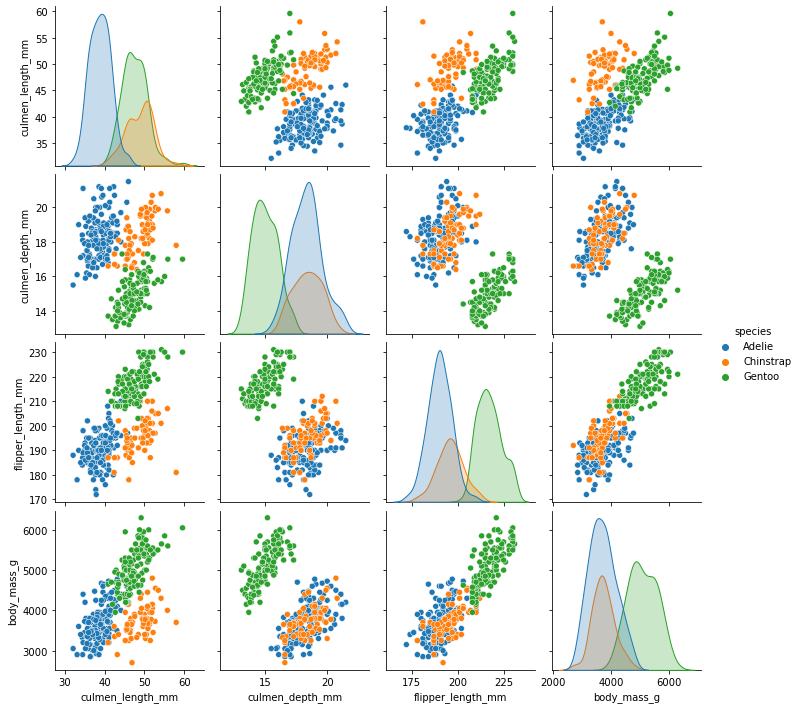

In [18]:
sns.pairplot(df,hue='species')

# Now let's use catplot to drow boxplot for species when col=sex:

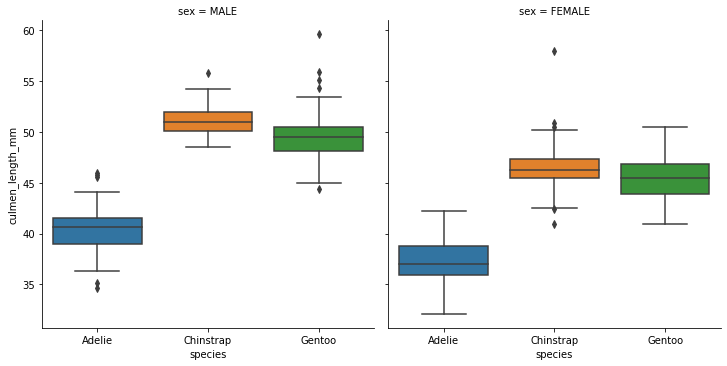

In [20]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex')

# To check the island column:

In [21]:
df['island']

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 334, dtype: object

# To separate X & y ,and get dummies for the string info in X:

In [22]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [23]:
y=df['species']

# Now Importing the train_test_split library and split the train and test values:

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Now let's import the DecisionTreeClassifier library:

In [26]:
from sklearn.tree import DecisionTreeClassifier

# To create the object and fit it:

In [27]:
model=DecisionTreeClassifier()

In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

# To make the prediction to X_test:

In [29]:
base_preds=model.predict(X_test)

# To check the base_preds infos:

In [30]:
base_preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie'

# Now let's import the metrics libraries:

In [31]:
from sklearn.metrics import plot_confusion_matrix,classification_report

# Now let's use the classification_report:

In [32]:
print(classification_report(y_test,base_preds))

              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101



# Now for the plot_confusion_matrix:

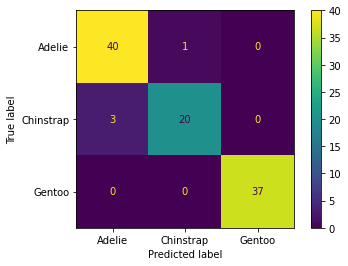

In [34]:
plot_confusion_matrix(model,X_test,y_test)

# To check the feature_importances:

In [35]:
model.feature_importances_

array([0.32352044, 0.05366774, 0.542054  , 0.00239775, 0.07836008,
       0.        , 0.        ])

# To plot the tree first we should import the plot_tree:

In [36]:
from sklearn.tree import plot_tree

# Then we plot it:

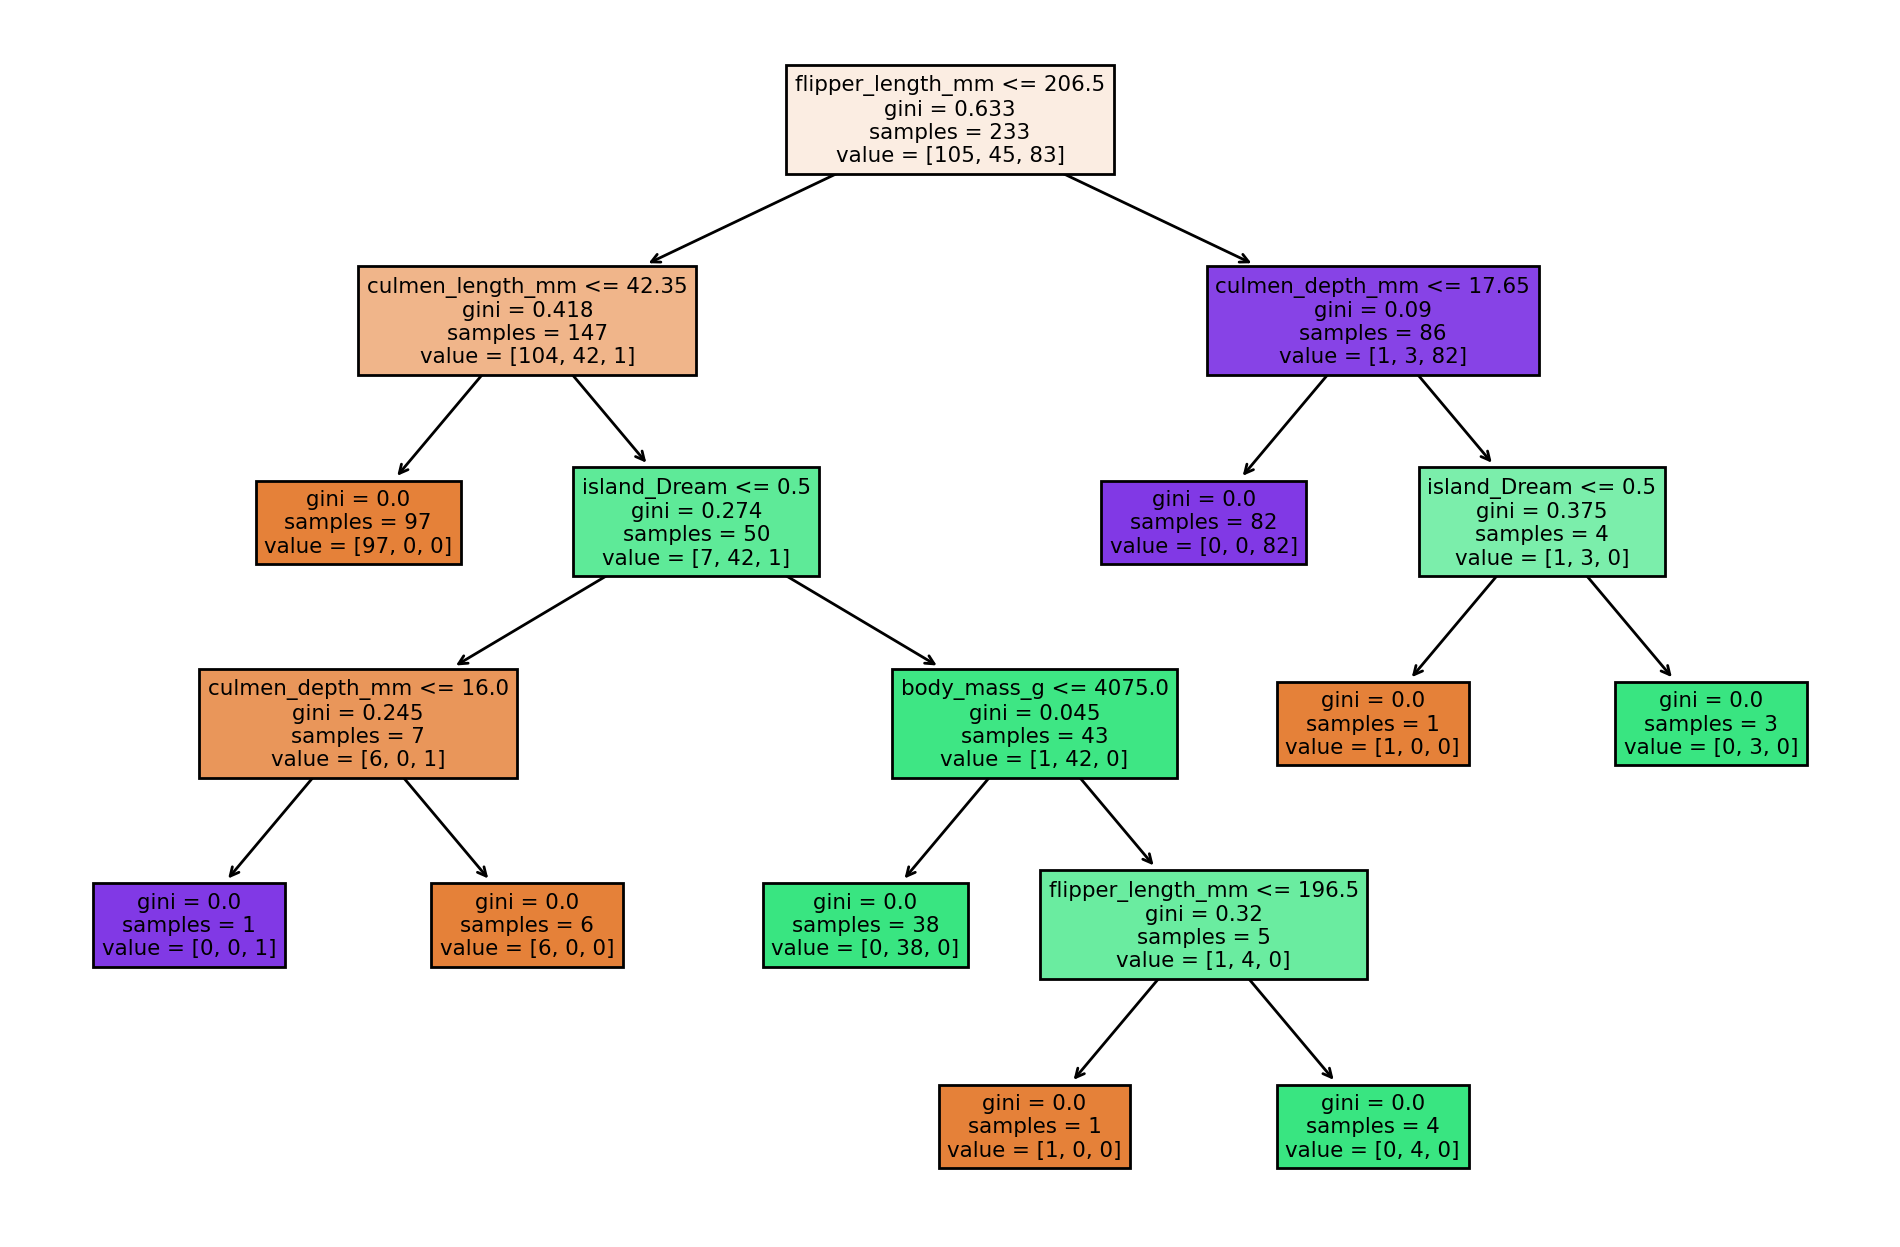

In [39]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model,feature_names=X.columns,filled=True);